<a href="https://colab.research.google.com/github/Marycruz1189/MaryC-MezaR/blob/main/fastai_waste_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential,load_model
from sklearn import model_selection
from os import listdir
from os.path import isfile, join
import tensorflow as tf
from skimage.io import imread
import cv2
import re
import glob
from sklearn import preprocessing

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path_train = '/content/gdrive/MyDrive/ML_Project/data/train' +  "/" + '**'  +  '/' + '**.jpg'
path_train

'/content/gdrive/MyDrive/ML_Project/data/train/**/**.jpg'

In [ ]:
path = Path(os.getcwd())/"data"
path

PosixPath('/content/data')

In [ ]:
import glob
import pandas as pd



def make_imag_df(path):
    dictionary = {}
    for paths in glob.glob(path):
        dictionary.setdefault('path_train', []).append(paths.split('/')[-3])
        dictionary.setdefault('name', []).append(paths.split('/')[-2])
        dictionary.setdefault('id', []).append(paths.split('/')[-1][:-4])
        dictionary.setdefault('img', []).append(paths.split('/')[-1])
        
    images = pd.DataFrame(dictionary)
    return images

train_set = make_imag_df(path_train)

In [ ]:
#funcion columna
def creat_colum (dataframe):
    le = preprocessing.LabelEncoder()
    dataframe['path']= dataframe.name + "/" + dataframe.img
    dataframe['label']= le.fit_transform(dataframe.name)

    return dataframe

In [ ]:
train_set = creat_colum (train_set)

In [ ]:
train_set

,path_train,name,id,img,path,label
0,train,metal,metal178,metal178.jpg,metal/metal178.jpg,4
1,train,metal,metal444,metal444.jpg,metal/metal444.jpg,4
2,train,metal,metal81,metal81.jpg,metal/metal81.jpg,4
3,train,metal,metal11,metal11.jpg,metal/metal11.jpg,4
4,train,metal,metal472,metal472.jpg,metal/metal472.jpg,4
...,...,...,...,...,...,...
4907,train,trash,trash80,trash80.jpg,trash/trash80.jpg,7
4908,train,trash,trash98,trash98.jpg,trash/trash98.jpg,7
4909,train,trash,trash85,trash85.jpg,trash/trash85.jpg,7
4910,train,trash,trash91,trash91.jpg,trash/trash91.jpg,7


In [17]:
path_path = '/content/gdrive/MyDrive/ML_Project/data/train' +  "/" 
path_path

'/content/gdrive/MyDrive/ML_Project/data/train/'

In [34]:
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
path = '/content/gdrive/MyDrive/ML_Project/data/train'

In [22]:
classes = []
for d in os.listdir(path):
    if os.path.isdir(os.path.join(path, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)  

There are  8 classes:
 ['metal', 'battery', 'biological', 'glass', 'cardboard', 'paper', 'plastic', 'trash']


Let's verify there are not any corrupt images that cannot be read. If found any, they will simply be deleted.

In [24]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(path, c), delete=True);

Class: metal


Class: battery


Class: biological


Class: glass


Class: cardboard


Class: paper


Class: plastic


Class: trash


Creating and training the classifier

Let's split our dataset to 80% for training and 20% for validation,

In [35]:
data  = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [26]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 3930 training images and 982 validation images.


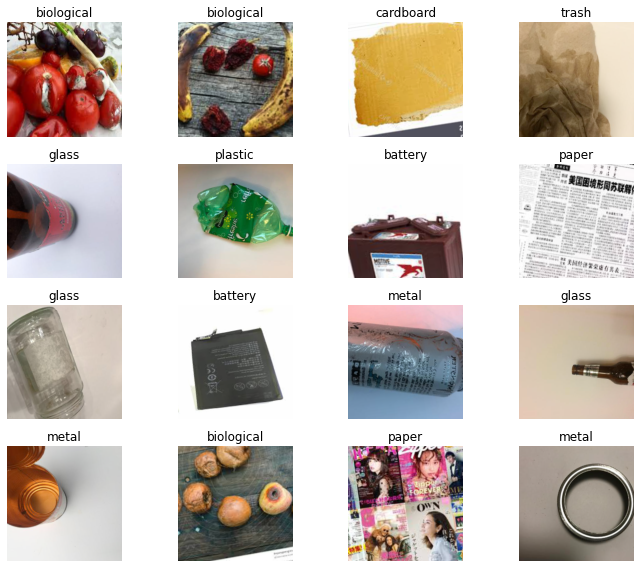

In [30]:
data.show_batch(rows=4,figsize=(10,8))

Build our Deep Convolutional Neural Network (CNN)

In [36]:
data

ImageDataBunch;

Train: LabelList (3930 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
metal,metal,metal,metal,metal
Path: /content/gdrive/MyDrive/ML_Project/data/train;

Valid: LabelList (982 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
paper,paper,metal,cardboard,biological
Path: /content/gdrive/MyDrive/ML_Project/data/train;

Test: None

Model training

Case1: use resnet34 for training

In [38]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Let's now pick the appropriate learning rate parameter

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


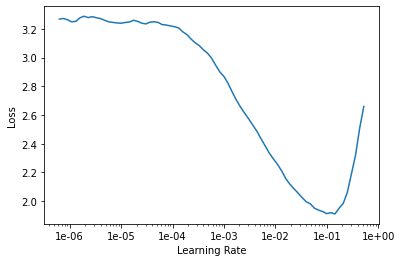

In [39]:
learn.lr_find();
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.822589,0.575327,0.838086,00:45
1,0.576547,0.343543,0.892057,00:45
2,0.379513,0.276552,0.927699,00:46
3,0.242068,0.249730,0.932790,00:45


we achieved a high classification accuracy of 0,93%

Results Interpretation and Visualization

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

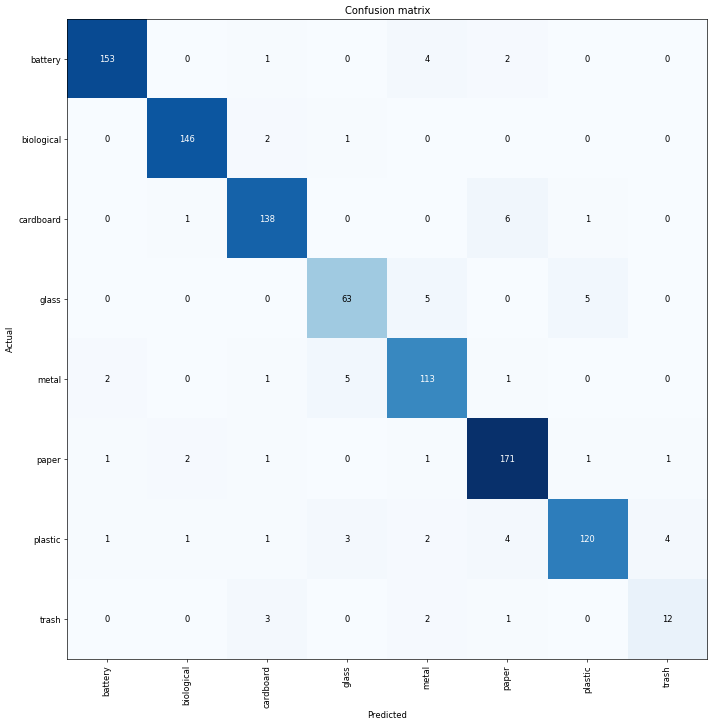

In [42]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In a confusion matrix, the diagonal elements represent the number of images for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

In [44]:
interp.most_confused(min_val=2)

[('cardboard', 'paper', 6),
 ('glass', 'metal', 5),
 ('glass', 'plastic', 5),
 ('metal', 'glass', 5),
 ('battery', 'metal', 4),
 ('plastic', 'paper', 4),
 ('plastic', 'trash', 4),
 ('plastic', 'glass', 3),
 ('trash', 'cardboard', 3),
 ('battery', 'paper', 2),
 ('biological', 'cardboard', 2),
 ('metal', 'battery', 2),
 ('paper', 'biological', 2),
 ('plastic', 'metal', 2),
 ('trash', 'metal', 2)]

ClassificationInterpretation provides a visualization of the misclassfied images.

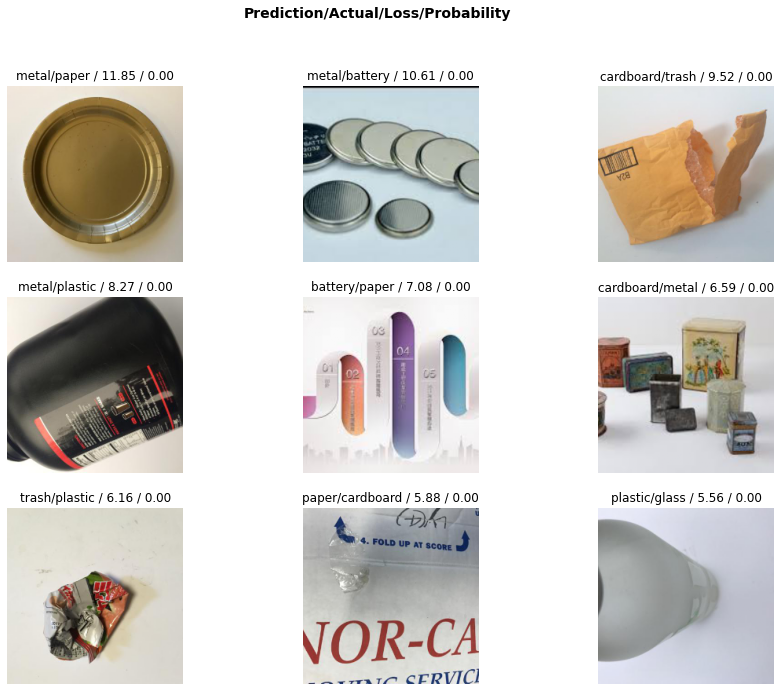

In [43]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)